In this lab, we use the sklearn.svm library to demonstrate the support
vector classifer and the support vector machine

We import some of our usual libraries.

In [1]:
import numpy as np
from matplotlib.pyplot import subplots , cm
import sklearn.model_selection as skm
from ISLP import load_data , confusion_table

We also collect the new imports needed for this lab

In [2]:
from sklearn.svm import SVC
from ISLP.svm import plot as plot_svm
from sklearn.metrics import RocCurveDisplay

We will use the function RocCurveDisplay.from_estimator() to produce 
several ROC plots, using a shorthand roc_curve.


In [3]:
 roc_curve = RocCurveDisplay.from_estimator # shorthand

#### 9.6.1 Support Vector Classifer

We now use the SupportVectorClassifier() function (abbreviated SVC())
from sklearn to fit the support vector classifer for a given value of the
parameter C. The C argument allows us to specify the cost of a violation
to the margin. When the cost argument is small, then the margins will be
wide and many support vectors will be on the margin or will violate the
margin. When the C argument is large, then the margins will be narrow and
there will be few support vectors on the margin or violating the margin.

Here we demonstrate the use of SVC() on a two-dimensional example, so
that we can plot the resulting decision boundary. We begin by generating
the observations, which belong to two classes, and checking whether the
classes are linearly separable

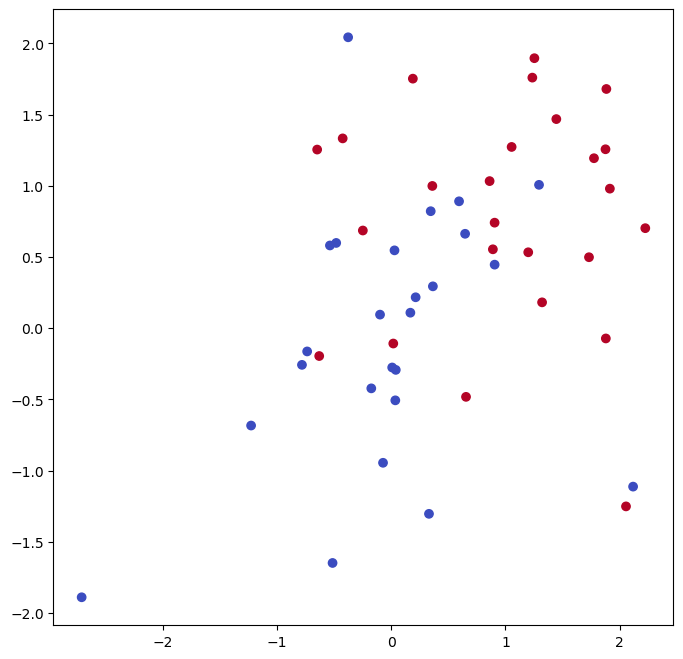

In [4]:
rng = np.random.default_rng(1)
X = rng.standard_normal((50, 2))
y = np.array([-1]*25+[1]*25)
X[y==1] += 1
fig, ax = subplots(figsize=(8,8))
ax.scatter(X[:,0],
           X[:,1],
           c=y,
           cmap=cm.coolwarm);

They are not. We now ft the classifer.

In [5]:
svm_linear = SVC(C=10, kernel='linear')
svm_linear.fit(X, y)

SVC(C=10, kernel='linear')

The support vector classifer with two features can be visualized by plotting values of its decision function. 
We have included a function for this the ISLP package (inspired by a similar example in the sklearn docs)

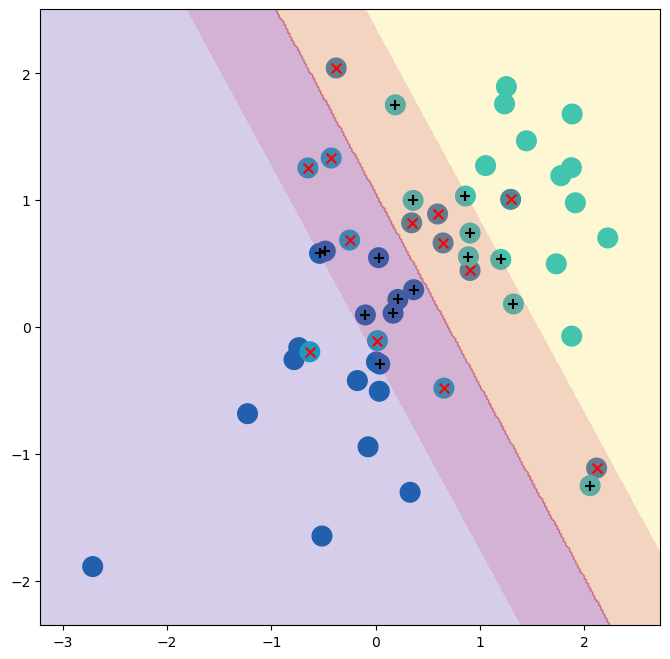

In [6]:
fig, ax = subplots(figsize=(8,8))
plot_svm(X,
         y,
         svm_linear ,
         ax=ax)

The decision boundary between the two classes is linear (because we
used the argument kernel='linear'). The support vectors are marked with
+ and the remaining observations are plotted as circles.

What if we instead used a smaller value of the cost parameter?

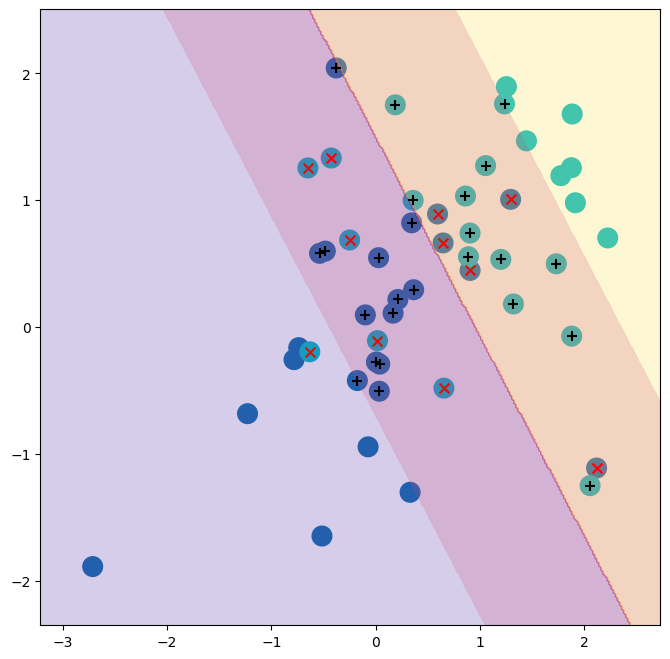

In [7]:
svm_linear_small = SVC(C=0.1, kernel='linear')
svm_linear_small.fit(X, y)
fig, ax = subplots(figsize=(8,8))
plot_svm(X,
         y,
         svm_linear_small ,
         ax=ax)


With a smaller value of the cost parameter, we obtain a larger number of
support vectors, because the margin is now wider. For linear kernels, we
can extract the coefcients of the linear decision boundary as follows:

In [8]:
svm_linear.coef_

array([[1.17303943, 0.77348227]])

Since the support vector machine is an estimator in sklearn, we can use
the usual machinery to tune it.

In [9]:
kfold = skm.KFold(5,
                  random_state=0,
                  shuffle=True)
grid = skm.GridSearchCV(svm_linear ,
                        {'C':[0.001,0.01,0.1,1,5,10,100]},
                         refit=True,
                         cv=kfold,
                         scoring='accuracy')
grid.fit(X, y)
grid.best_params_

{'C': 1}

We can easily access the cross-validation errors for each of these models in
grid.cv_results_. This prints out a lot of detail, so we extract the accuracy
results only.

In [10]:
grid.cv_results_[('mean_test_score')]

array([0.46, 0.46, 0.72, 0.74, 0.74, 0.74, 0.74])

We see that C=1 results in the highest cross-validation accuracy of 0.74,
though the accuracy is the same for several values of C. The classifer
grid.best_estimator_ can be used to predict the class label on a set of
test observations. Let’s generate a test data set.

In [11]:
X_test = rng.standard_normal((20, 2))
y_test = np.array([-1]*10+[1]*10)
X_test[y_test==1] += 1

Now we predict the class labels of these test observations. Here we use the
best model selected by cross-validation in order to make the predictions.

In [12]:
best_ = grid.best_estimator_
y_test_hat = best_.predict(X_test)
confusion_table(y_test_hat , y_test)

Truth,-1,1
Predicted,,
-1,8,4
1,2,6


Thus, with this value of C, 70% of the test observations are correctly classifed. What if we had instead used C=0.001?

In [13]:
 svm_ = SVC(C=0.001,
            kernel='linear').fit(X, y)
y_test_hat = svm_.predict(X_test)
confusion_table(y_test_hat , y_test)

Truth,-1,1
Predicted,,
-1,2,0
1,8,10


In this case 60% of test observations are correctly classifed.

We now consider a situation in which the two classes are linearly separable. Then we can fnd an optimal separating hyperplane using the SVC()
estimator. We frst further separate the two classes in our simulated data
so that they are linearly separable:

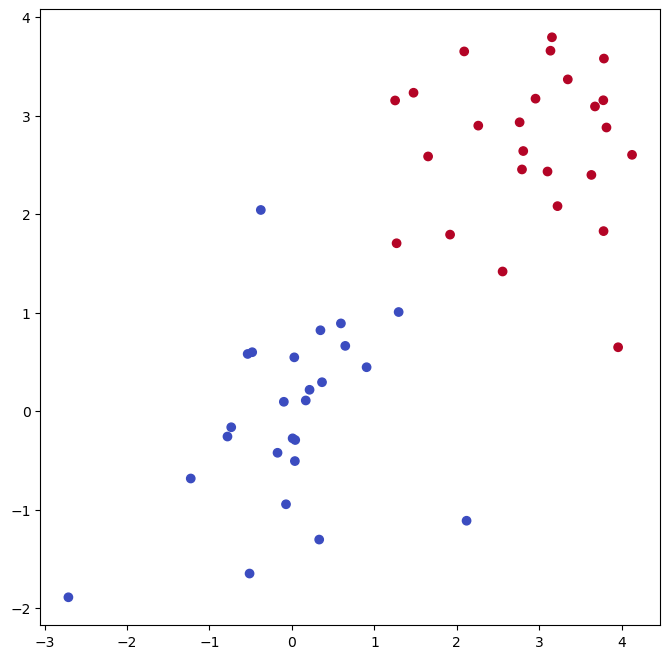

In [14]:
X[y==1] += 1.9;
fig, ax = subplots(figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=y, cmap=cm.coolwarm);

Now the observations are just barely linearly separable.

In [15]:
svm_ = SVC(C=1e5, kernel='linear').fit(X, y)
y_hat = svm_.predict(X)
confusion_table(y_hat, y)

Truth,-1,1
Predicted,,
-1,25,0
1,0,25


We ft the support vector classifer and plot the resulting hyperplane, using
a very large value of C so that no observations are misclassifed.

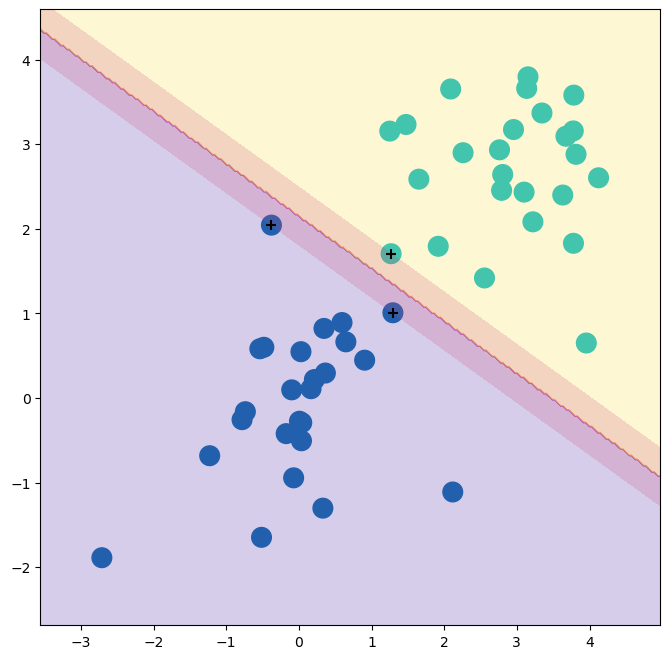

In [16]:
fig, ax = subplots(figsize=(8,8))
plot_svm(X,
         y,
         svm_,
         ax=ax)

Indeed no training errors were made and only three support vectors were
used. In fact, the large value of C also means that these three support points
are on the margin, and defne it. One may wonder how good the classifer
could be on test data that depends on only three data points! We now try
a smaller value of C

In [17]:
svm_ = SVC(C=0.1, kernel='linear').fit(X, y)
y_hat = svm_.predict(X)
confusion_table(y_hat, y)

Truth,-1,1
Predicted,,
-1,25,0
1,0,25


Using C=0.1, we again do not misclassify any training observations, but we
also obtain a much wider margin and make use of twelve support vectors.
These jointly defne the orientation of the decision boundary, and since
there are more of them, it is more stable. It seems possible that this model
will perform better on test data than the model with C=1e5 (and indeed, a
simple experiment with a large test set would bear this out).

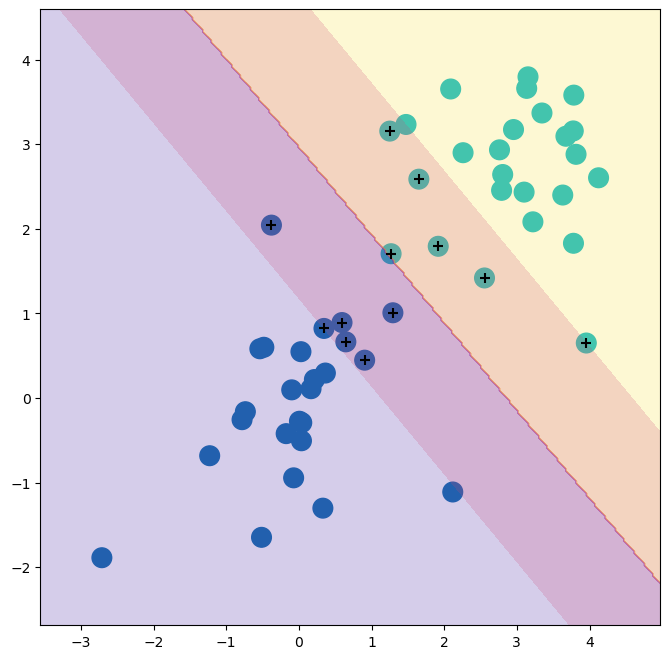

In [18]:
 fig, ax = subplots(figsize=(8,8))
plot_svm(X,
         y,
         svm_,
         ax=ax)

##### 9.6.2 Support Vector Machine

In order to ft an SVM using a non-linear kernel, we once again use the
SVC() estimator. However, now we use a diferent value of the parameter
kernel. To ft an SVM with a polynomial kernel we use kernel="poly", and
to ft an SVM with a radial kernel we use kernel="rbf". In the former case
we also use the degree argument to specify a degree for the polynomial
kernel (this is d in (9.22)), and in the latter case we use gamma to specify a
value of γ for the radial basis kernel (9.24).

We frst generate some data with a non-linear class boundary, as follows:

In [19]:
X = rng.standard_normal((200, 2))
X[:100] += 2
X[100:150] -= 2
y = np.array([1]*150+[2]*50)

Plotting the data makes it clear that the class boundary is indeed nonlinear.

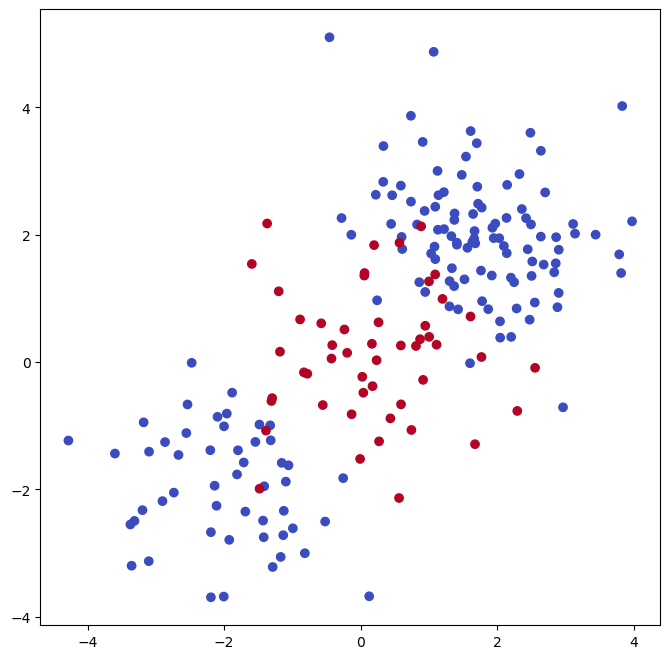

In [20]:
 fig, ax = subplots(figsize=(8,8))
ax.scatter(X[:,0],
           X[:,1],
           c=y,
           cmap=cm.coolwarm)

The data is randomly split into training and testing groups. We then ft
the training data using the SVC() estimator with a radial kernel and γ = 1:

In [21]:
(X_train ,
X_test,
y_train ,
y_test) = skm.train_test_split(X,
                               y,
                               test_size=0.5,
                               random_state=0)
svm_rbf = SVC(kernel="rbf", gamma=1, C=1)
svm_rbf.fit(X_train , y_train)


SVC(C=1, gamma=1)

The plot shows that the resulting SVM has a decidedly non-linear boundary.


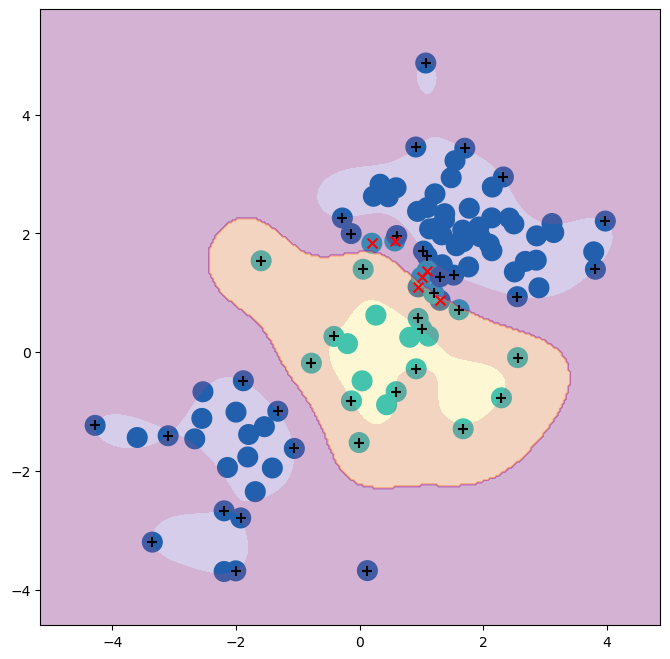

In [22]:
fig, ax = subplots(figsize=(8,8))
plot_svm(X_train ,
         y_train ,
         svm_rbf ,
         ax=ax)


We can see from the fgure that there are a fair number of training errors
in this SVM ft. If we increase the value of C, we can reduce the number
of training errors. However, this comes at the price of a more irregular
decision boundary that seems to be at risk of overftting the data.

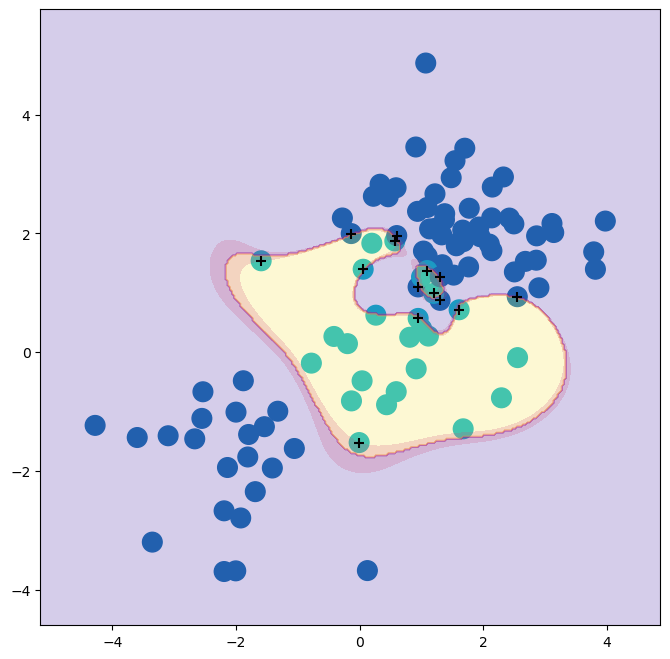

In [25]:
svm_rbf = SVC(kernel="rbf", gamma=1, C=1e5)
svm_rbf.fit(X_train , y_train)
fig, ax = subplots(figsize=(8,8))
plot_svm(X_train ,
         y_train ,
         svm_rbf ,
         ax=ax)

We can see from the fgure that there are a fair number of training errors
in this SVM ft. If we increase the value of C, we can reduce the number
of training errors. However, this comes at the price of a more irregular
decision boundary that seems to be at risk of overftting the data

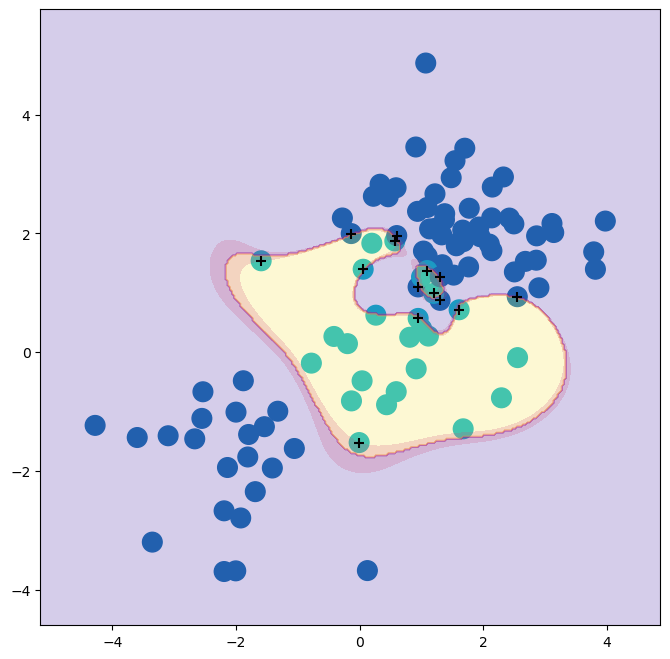

In [26]:
svm_rbf = SVC(kernel="rbf", gamma=1, C=1e5)
svm_rbf.fit(X_train , y_train)
fig, ax = subplots(figsize=(8,8))
plot_svm(X_train ,
         y_train ,
         svm_rbf ,
         ax=ax)


We can perform cross-validation using skm.GridSearchCV() to select the
best choice of γ and C for an SVM with a radial kernel:

In [27]:
kfold = skm.KFold(5,
                  random_state=0,
                  shuffle=True)
grid = skm.GridSearchCV(svm_rbf ,
                       {'C':[0.1,1,10,100,1000],
                       'gamma':[0.5,1,2,3,4]},
                        refit=True,
                        cv=kfold,
                        scoring='accuracy');
grid.fit(X_train , y_train)
grid.best_params_


{'C': 1, 'gamma': 0.5}

The best choice of parameters under fve-fold CV is achieved at C=1 and
gamma=0.5, though several other values also achieve the same value.


Truth,1,2
Predicted,,
1,69,6
2,6,19


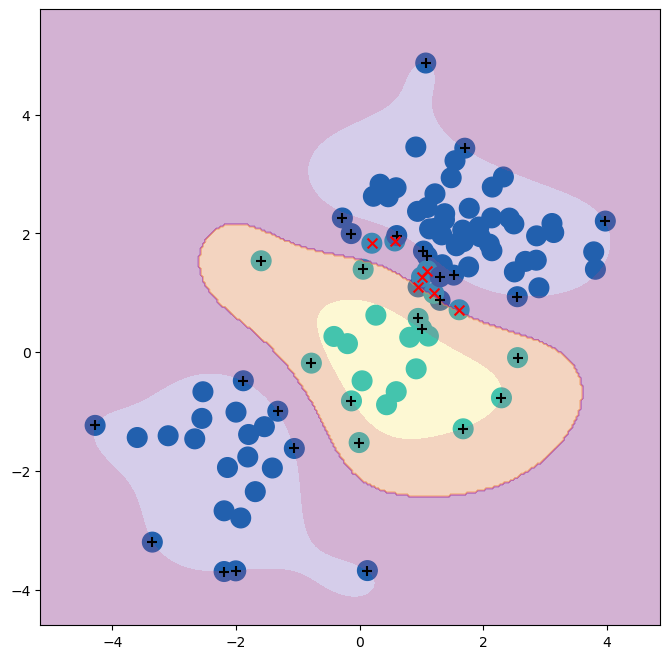

In [28]:
best_svm = grid.best_estimator_
fig, ax = subplots(figsize=(8,8))
plot_svm(X_train ,
         y_train ,
         best_svm ,
         ax=ax)
y_hat_test = best_svm.predict(X_test)
confusion_table(y_hat_test , y_test)

With these parameters, 12% of test observations are misclassifed by this
SVM.


##### 9.6.3 ROC Curves

SVMs and support vector classifers output class labels for each observation.
However, it is also possible to obtain ftted values for each observation,
which are the numerical scores used to obtain the class labels. For instance,
in the case of a support vector classifer, the ftted value for an observation
X = (X1, X2, . . . , Xp)
T
takes the form βˆ
0 +βˆ
1X1 +βˆ
2X2 +. . .+βˆ
pXp. For
an SVM with a non-linear kernel, the equation that yields the ftted value
is given in (9.23). The sign of the ftted value determines on which side
of the decision boundary the observation lies. Therefore, the relationship
between the ftted value and the class prediction for a given observation
is simple: if the ftted value exceeds zero then the observation is assigned
to one class, and if it is less than zero then it is assigned to the other.
By changing this threshold from zero to some positive value, we skew the
classifcations in favor of one class versus the other. By considering a range
of these thresholds, positive and negative, we produce the ingredients for a
ROC plot. We can access these values by calling the decision_function() method of a ftted SVM estimator

The function ROCCurveDisplay.from_estimator() (which we have abbreviated to roc_curve()) will produce a plot of a ROC curve. 
It takes a ftted estimator as its frst argument, followed by a model matrix X and labels y.
The argument name is used in the legend, while color is used for the color
of the line. Results are plotted on our axis object ax

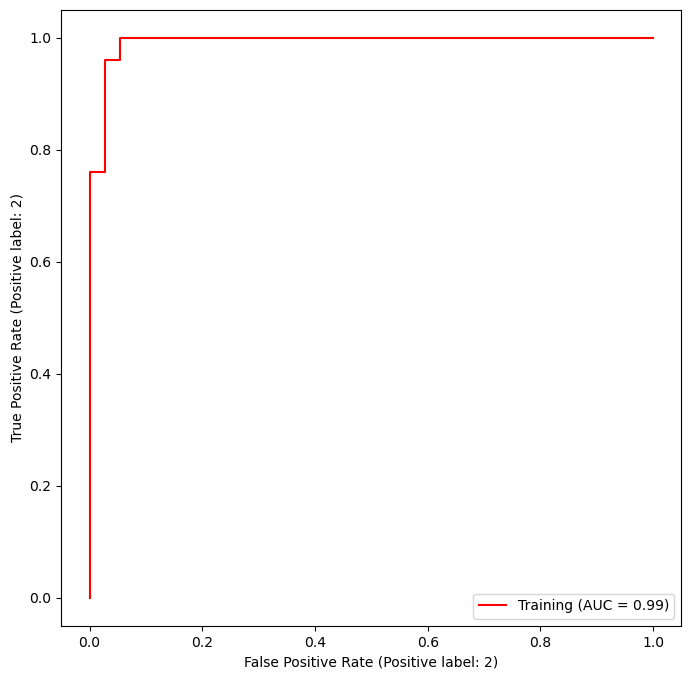

In [29]:
fig, ax = subplots(figsize=(8,8))
roc_curve(best_svm ,
          X_train ,
          y_train ,
          name='Training',
         color='r',
         ax=ax);

In this example, the SVM appears to provide accurate predictions. By
increasing γ we can produce a more fexible ft and generate further improvements in accuracy.

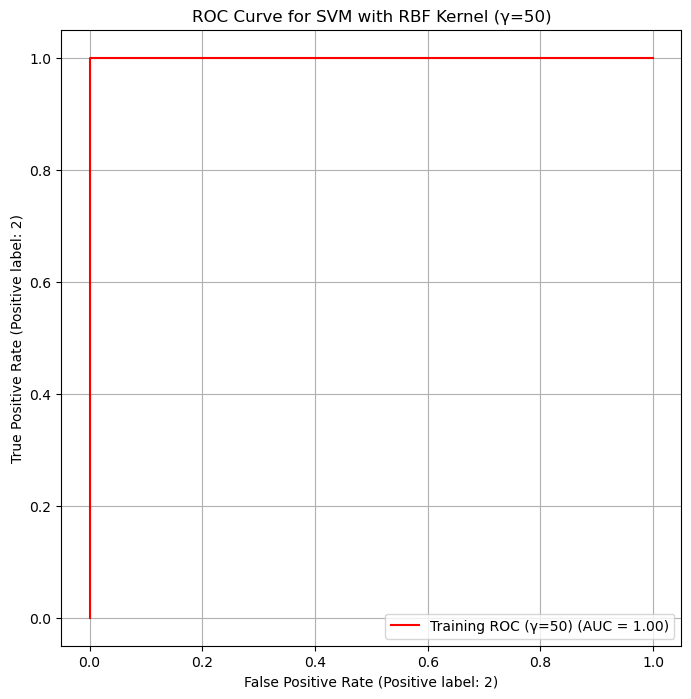

In [41]:
import matplotlib.pyplot as plt
# Create the model
svm_flex = SVC(kernel="rbf", gamma=50, C=1, probability=True)  # probability=True needed for ROC

# Fit the model
svm_flex.fit(X_train, y_train)

# Plot ROC curve
fig, ax = subplots(figsize=(8, 8))
RocCurveDisplay.from_estimator(
    estimator=svm_flex,
    X=X_train,
    y=y_train,
    name='Training ROC (γ=50)',
    color='r',
    ax=ax
)
plt.title("ROC Curve for SVM with RBF Kernel (γ=50)")
plt.grid(True)
plt.show()


However, these ROC curves are all on the training data. We are really
more interested in the level of prediction accuracy on the test data. When
we compute the ROC curves on the test data, the model with γ = 0.5
appears to provide the most accurate results.

In [42]:
roc_curve(svm_flex ,
          X_test,
          y_test,
          name='Test $\gamma=50$',
          color='b',
          ax=ax)
fig;


Let’s look at our tuned SVM

In [45]:
for (X_, y_, c, name) in zip(
    (X_train , X_test),
    (y_train , y_test),
    ('r', 'b'),
    ('CV tuned on training',
     'CV tuned on test')):
    roc_curve(best_svm ,
              X_,
              y_,
              name=name,
               ax=ax,
              color=c)

###### 9.6.4 SVM with Multiple Classes

If the response is a factor containing more than two levels, then the SVC()
function will perform multi-class classifcation using either the one-versusone approach (when decision_function_shape=='ovo') or one-versus-rest4
(when decision_function_shape=='ovr'). We explore that setting briefy
here by generating a third class of observations.

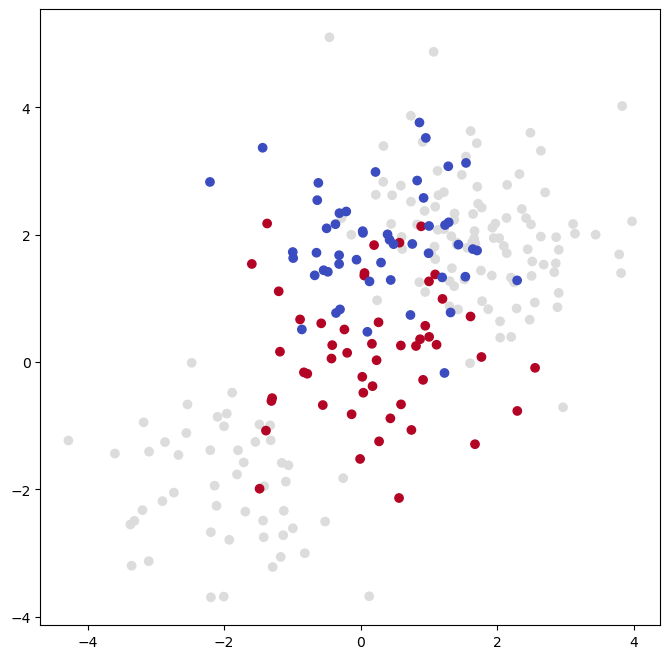

In [35]:
rng = np.random.default_rng(123)
X = np.vstack([X, rng.standard_normal((50, 2))])
y = np.hstack([y, [0]*50])
X[y==0,1] += 2
fig, ax = subplots(figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=y, cmap=cm.coolwarm);

We now ft an SVM to the data:

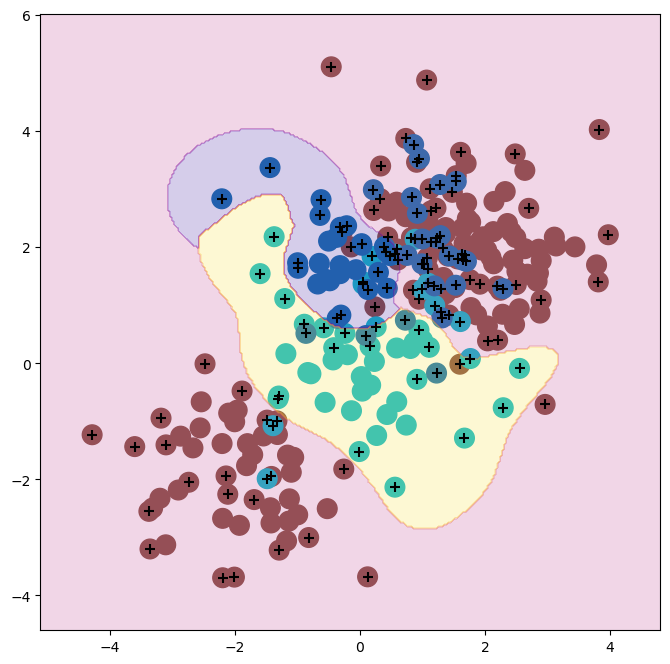

In [36]:
svm_rbf_3 = SVC(kernel="rbf",
                C=10,
                gamma=1,
                decision_function_shape='ovo');
svm_rbf_3.fit(X, y)
fig, ax = subplots(figsize=(8,8))
plot_svm(X,
         y,
         svm_rbf_3 ,
         scatter_cmap=cm.tab10,
         ax=ax)


The sklearn.svm library can also be used to perform support vector regression with a numerical response using the estimator SupportVectorRegression().

###### 9.6.5 Application to Gene Expression Data

We now examine the Khan data set, which consists of a number of tissue
samples corresponding to four distinct types of small round blue cell tumors. For each tissue sample, gene expression measurements are available.
The data set consists of training data, xtrain and ytrain, and testing data,
xtest and ytest.

We examine the dimension of the data:

In [37]:
Khan = load_data('Khan')
Khan['xtrain'].shape, Khan['xtest'].shape


((63, 2308), (20, 2308))

This data set consists of expression measurements for 2,308 genes. The
training and test sets consist of 63 and 20 observations, respectively.
We will use a support vector approach to predict cancer subtype using
gene expression measurements. In this data set, there is a very large number
of features relative to the number of observations. This suggests that we
should use a linear kernel, because the additional fexibility that will result
from using a polynomial or radial kernel is unnecessary.

In [38]:
 khan_linear = SVC(kernel='linear', C=10)
khan_linear.fit(Khan['xtrain'], Khan['ytrain'])
confusion_table(khan_linear.predict(Khan['xtrain']),
                Khan['ytrain'])

Truth,1,2,3,4
Predicted,,,,
1,8,0,0,0
2,0,23,0,0
3,0,0,12,0
4,0,0,0,20


We see that there are no training errors. In fact, this is not surprising,
because the large number of variables relative to the number of observations
implies that it is easy to fnd hyperplanes that fully separate the classes.

We are more interested in the support vector classifer’s performance on
the test observations.

In [39]:
confusion_table(khan_linear.predict(Khan['xtest']),
                                   Khan['ytest'])


Truth,1,2,3,4
Predicted,,,,
1,3,0,0,0
2,0,6,2,0
3,0,0,4,0
4,0,0,0,5


We see that using C=10 yields two test set errors on these data